# Lab 1 - SQL and Python

In [9]:
%reload_ext sql

In [10]:
%%bash
sqlite3 enron.db .tables

Employee          EmployeeWithVars  MessageBase       RecipientBase   
EmployeeBase      Message           Recipient       


#### Select the first 5 rows from EmployeeBase

In [13]:
%%sql sqlite:///enron.db
SELECT * FROM EmployeeBase LIMIT 5

(OperationalError) cannot commit - no transaction is active 'commit' ()


#### What the first 5 rows from MessageBase?

In [13]:
%%sql sqlite:///enron.db
SELECT * FROM MessageBase LIMIT 5

(OperationalError) cannot commit - no transaction is active 'commit' ()


#### What are the last 5 messages sent?

In [6]:
%%sql sqlite:///enron.db
SELECT * FROM MessageBase ORDER BY unix_time DESC LIMIT 5

Done.


mid,filename,unix_time,subject,from_eid
21635,germany-c/inbox/23,1024666654,Master Termination Log,92
21634,germany-c/inbox/42,1023970571,Netting Agreement Materials,4
21633,germany-c/personal/1,1023873696,RE: Job Ops,57
21632,germany-c/sent_items/74,1023873633,Job Ops,39
21631,germany-c/inbox/49,1023708531,NNG Deals,39


#### Who sent the first 5 messages?

In [7]:
%%sql sqlite:///enron.db
SELECT unix_time, name, department, title, gender, seniority, subject, filename
FROM EmployeeBase JOIN MessageBase ON eid = from_eid LIMIT 5

Done.


unix_time,name,department,title,gender,seniority,subject,filename
910930020,Mark E. Taylor,Legal,VP & Gen Cnsl,Male,Senior,Cd$ CME letter,taylor-m/sent/11
911459940,Mark E. Taylor,Legal,VP & Gen Cnsl,Male,Senior,Indemnification,taylor-m/sent/17
911463840,Mark E. Taylor,Legal,VP & Gen Cnsl,Male,Senior,Re: Indemnification,taylor-m/sent/18
911874180,Mark E. Taylor,Legal,VP & Gen Cnsl,Male,Senior,"Re: Coral Energy, L.P.",taylor-m/sent/23
912396120,Mark E. Taylor,Legal,VP & Gen Cnsl,Male,Senior,Bankruptcy Code revisions,taylor-m/sent/27


#### What are the first 5 rows in the RecipientBase?

In [8]:
%%sql sqlite:///enron.db
SELECT * FROM RecipientBase LIMIT 9

(OperationalError) cannot commit - no transaction is active 'commit' ()


#### Get all messages received by 57 recipients (rno)

In [8]:
%%sql sqlite:///enron.db
SELECT * FROM RecipientBase WHERE rno = 57

Done.


mid,rno,to_eid
12116,57,51
12151,57,51


#### Get the messages for mid=12116, 12151

In [9]:
%%sql sqlite:///enron.db
SELECT * FROM MessageBase WHERE mid IN (12116, 12151)

Done.


mid,filename,unix_time,subject,from_eid
12116,baughman-d/all_documents/398,990510780,,67
12151,baughman-d/ect_admin/22,990546780,,67


#### Who is employee 67?

In [10]:
%%sql sqlite:///enron.db
SELECT * FROM EmployeeBase WHERE eid=67

Done.


eid,name,department,longdepartment,title,gender,seniority
67,John J. Lavorato,Other,EWS,ENA President & CEO,Male,Senior


#### Who sent the email to the most recipients?

In [11]:
%%sql sqlite:///enron.db
SELECT name, title, MAX(rno)
FROM EmployeeBase 
JOIN MessageBase ON eid = from_eid 
JOIN RecipientBase USING(mid)

Done.


name,title,MAX(rno)
John J. Lavorato,ENA President & CEO,57


#### Who are the top five senders of mass emails?

In [12]:
%%sql sqlite:///enron.db
SELECT eid, name, count(name) FROM EmployeeBase 
JOIN MessageBase ON eid=from_eid 
GROUP BY name ORDER BY count(name) DESC LIMIT 5

# SELECT name, title, MAX(rno) AS recipient_count
# FROM EmployeeBase 
# JOIN MessageBase ON eid = from_eid 
# JOIN RecipientBase USING(mid) 
# GROUP BY name, title ORDER BY recipient_count DESC LIMIT 5

Done.


eid,name,count(name)
20,Jeff Dasovich,1597
59,Tana Jones,1379
120,Sara Shackleton,1142
131,James D. Steffes,859
138,Mark E. Taylor,658


#### Who sent the last email?

In [13]:
%%sql sqlite:///enron.db
SELECT unix_time, eid, name, count(name) 
FROM EmployeeBase JOIN MessageBase ON eid=from_eid 
GROUP BY name ORDER BY unix_time DESC LIMIT 5

Done.


unix_time,eid,name,count(name)
1024666654,92,Stephanie Panus,273
1023970571,4,Susan Bailey,125
1023873696,57,Kevin Hyatt,138
1023873633,39,Chris Germany,443
1022598148,77,Kay Mann,202


#### Who were the last 5 people to receive emails?

In [14]:
%%sql sqlite:///enron.db
SELECT * 
FROM RecipientBase 
JOIN MessageBase ON RecipientBase.mid=MessageBase.mid 
ORDER BY unix_time DESC LIMIT 5

Done.


mid,rno,to_eid,mid_1,filename,unix_time,subject,from_eid
21635,1,39,21635,germany-c/inbox/23,1024666654,Master Termination Log,92
21635,2,120,21635,germany-c/inbox/23,1024666654,Master Termination Log,92
21635,3,4,21635,germany-c/inbox/23,1024666654,Master Termination Log,92
21634,1,92,21634,germany-c/inbox/42,1023970571,Netting Agreement Materials,4
21634,2,113,21634,germany-c/inbox/42,1023970571,Netting Agreement Materials,4


In [15]:
%%sql sqlite:///enron.db
SELECT eid, unix_time, name 
FROM Employee 
JOIN (SELECT * FROM RecipientBase JOIN MessageBase ON RecipientBase.mid=MessageBase.mid ORDER BY unix_time DESC LIMIT 5) ON eid = to_eid

Done.


eid,unix_time,name
39,1024666654,Chris Germany
120,1024666654,Sara Shackleton
4,1024666654,Susan Bailey
92,1023970571,Stephanie Panus
113,1023970571,Richard B. Sanders


#### Who didn't send any email?

In [17]:
%%sql sqlite:///enron.db
SELECT eid, name
FROM EmployeeBase
WHERE eid NOT IN (SELECT from_eid FROM MessageBase)

Done.


eid,name
32,Mary Fischer
37,Rob G. Gay
52,Judy Hernandez
139,Michael E. Taylor


#### Who didn't receive any email?

In [18]:
%%sql sqlite:///enron.db
SELECT eid, name
FROM EmployeeBase
WHERE eid NOT IN (SELECT to_eid FROM RecipientBase)

Done.


eid,name
32,Mary Fischer
37,Rob G. Gay


### Working with Pandas Data Frames and SQL

In [19]:
%matplotlib inline

import sqlite3

In [20]:
import pandas as pd
conn = sqlite3.connect('enron.db')

In [21]:
from seaborn import plt

In [22]:
pd.read_sql("""SELECT mid, unix_time, subject, from_eid
                FROM MessageBase ORDER BY unix_time DESC LIMIT 5""", conn, "mid")

,unix_time,subject,from_eid
mid,,,
21635,1024666654,Master Termination Log,92
21634,1023970571,Netting Agreement Materials,4
21633,1023873696,RE: Job Ops,57
21632,1023873633,Job Ops,39
21631,1023708531,NNG Deals,39


In [23]:
MessageBase = pd.read_sql("""SELECT mid, unix_time, subject, from_eid FROM MessageBase""", conn, "mid")
MessageBase.sort(ascending=False, columns=['unix_time']).head()

,unix_time,subject,from_eid
mid,,,
21635,1024666654,Master Termination Log,92
21634,1023970571,Netting Agreement Materials,4
21633,1023873696,RE: Job Ops,57
21632,1023873633,Job Ops,39
21631,1023708531,NNG Deals,39


In [24]:
recipient_counts = pd.read_sql("""SELECT mid, datetime(unix_time, 'unixepoch') AS time_sent, MAX(rno) AS recipient_count 
                        FROM MessageBase JOIN RecipientBase USING (mid) GROUP BY mid, time_sent""", conn, "mid")

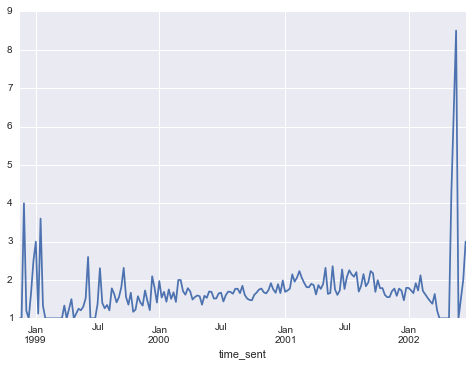

In [25]:
w = recipient_counts.time_sent.map(lambda dt: pd.Period(dt, freq='W'))
recipient_counts.groupby(w).recipient_count.mean().plot()

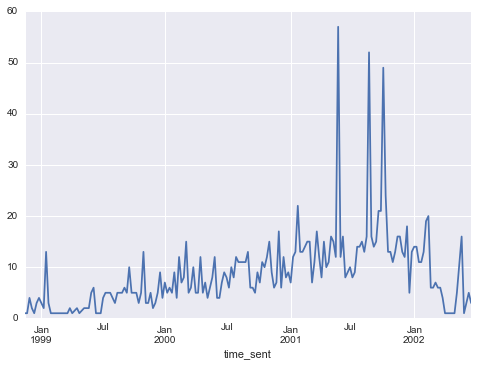

In [26]:
recipient_counts.groupby(w).recipient_count.max().plot()

In [27]:
recipient_counts.groupby(w).recipient_count.max()

time_sent
1998-11-09/1998-11-15     1
1998-11-16/1998-11-22     1
1998-11-23/1998-11-29     4
1998-11-30/1998-12-06     2
1998-12-07/1998-12-13     1
1998-12-14/1998-12-20     3
1998-12-21/1998-12-27     4
1998-12-28/1999-01-03     3
1999-01-04/1999-01-10     2
1999-01-11/1999-01-17    13
1999-01-18/1999-01-24     3
1999-01-25/1999-01-31     1
1999-02-01/1999-02-07     1
1999-02-08/1999-02-14     1
1999-02-22/1999-02-28     1
...
2002-02-25/2002-03-03     6
2002-03-04/2002-03-10     7
2002-03-11/2002-03-17     6
2002-03-18/2002-03-24     6
2002-03-25/2002-03-31     4
2002-04-01/2002-04-07     1
2002-04-08/2002-04-14     1
2002-04-15/2002-04-21     1
2002-04-22/2002-04-28     1
2002-04-29/2002-05-05     1
2002-05-06/2002-05-12     5
2002-05-20/2002-05-26    16
2002-05-27/2002-06-02     1
2002-06-10/2002-06-16     5
2002-06-17/2002-06-23     3
Freq: W-SUN, Name: recipient_count, Length: 184

In [28]:
# What were the subject lines (if any) of the top 5 messages sorted by recipient count (in descending order)?
MessageBase

,unix_time,subject,from_eid
mid,,,
1,910930020,Cd$ CME letter,138
2,911459940,Indemnification,138
3,911463840,Re: Indemnification,138
4,911874180,"Re: Coral Energy, L.P.",138
5,912396120,Bankruptcy Code revisions,138
6,912570420,Re: Position Description,138
7,912576240,Koch,138
8,912685080,Re: Time to Celebrate!,138
9,912734100,Re: Vacation Request,138


In [30]:
recipient_counts = pd.read_sql("""SELECT mid,subject, datetime(unix_time, 'unixepoch') AS time_sent, MAX(rno) AS recipient_count 
                        FROM MessageBase JOIN RecipientBase USING (mid) GROUP BY mid, time_sent""", conn, "mid")

In [33]:
recipient_counts.sort(columns='recipient_count', ascending=False)

,subject,time_sent,recipient_count
mid,,,
12116,,2001-05-22 05:53:00,57
12151,,2001-05-22 15:53:00,57
12140,,2001-05-22 10:53:56,55
14404,Associate/Analyst Program,2001-08-23 11:24:25,52
16035,Enron Center South (ECS) Move Back-up Plan,2001-10-05 14:03:57,49
16431,Park City Bound,2001-10-12 13:35:28,24
8116,7th Annual Party,2001-01-25 04:15:00,22
15577,FW: Fantastic Friday/Super Saturday Interviewers,2001-09-27 06:24:25,21
15148,RTO/regulatory update,2001-09-18 14:18:47,21


In [35]:
recipient_counts.sort(columns='time_sent', ascending=False).head()

,subject,time_sent,recipient_count
mid,,,
21635,Master Termination Log,2002-06-21 13:37:34,3
21634,Netting Agreement Materials,2002-06-13 12:16:11,5
21633,RE: Job Ops,2002-06-12 09:21:36,1
21632,Job Ops,2002-06-12 09:20:33,1
21631,NNG Deals,2002-06-10 11:28:51,1


In [36]:
most_emails = pd.read_sql("""SELECT eid, name, count(name) FROM EmployeeBase JOIN MessageBase ON eid=from_eid GROUP BY name ORDER BY count(name) DESC LIMIT 5""", conn, "eid")

In [37]:
most_emails.head()

,name,count(name)
eid,,
20,Jeff Dasovich,1597
59,Tana Jones,1379
120,Sara Shackleton,1142
131,James D. Steffes,859
138,Mark E. Taylor,658


In [41]:
last_emails_20 = pd.read_sql("""SELECT subject, unix_time FROM MessageBase WHERE from_eid = 20 LIMIT 30""", conn)
last_emails_20.sort()

,subject,unix_time
0,Sempra's Marketing in Jersey,941080080
1,Re: I.99-07-003: Post-Interim Settlement Agree...,954840720
2,Re: SoCal GIR settlement telecon,955174260
3,Re: PG&E's Prepared Direct Testimony in I.99-0...,957786900
4,FW: Late Exhibit Draft,960893400
5,Re: Pedersen inquiry,961055280
6,RE: Final Late Exhibit Draft,961130460
7,Settlement to Unbundle SoCalGas' Transportatio...,963316140
8,Re: Subpoena,963807540
9,Re: Generic One-Pager on Price Caps,964413240
